<a href="https://colab.research.google.com/github/vkumar61/MAT421/blob/main/Module_G_Section_21_1%2C_21_2%2C_21_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Numerical Integration

Integrals are important across multiple fields of science and engineering. However, any Calculus II student will tell you that solving them analytically is very time-consuming, and in fact, most functions are not analytically integrable. Thus, we turn to computers to give us a numerical approximation of integrals. To be more specific, we consider definite integrals, i.e., with finite bounds. In this case, it is very common to describe an integral as the area under a curve. Thus, what we are really after are methods that, given an arbitrary analytic function, allow us to calculate the area under an arbitrary curve with finite bounds. The two methods we will discuss here are the **Reimann Sum** and **Trapezoidal Rule**.

### Reimann Sum

The Riemann Sum approximation method is a fundamental technique in numerical integration, providing a simple yet effective way to approximate the area under a curve. At its core, the concept involves dividing the interval over which the integral is defined into smaller subintervals and approximating the area under the curve within each subinterval using geometric shapes, typically rectangles. By summing up the areas of these rectangles, we obtain an estimate of the total area under the curve.

One common approach to constructing Riemann Sums involves evaluating the function at the left endpoint of each subinterval to determine the height of the corresponding rectangle, known as the Left Riemann Sum, and alternatively, at the right endpoint to determine the height of rectangles in the Right Riemann Sum. In both methods, rectangles are used to approximate the area under the curve within each subinterval. By summing the areas of these rectangles, each representing the function's value at either the left or right endpoint of its respective interval, we obtain approximations of the integral. It is easy to see however that if a function is increasing, these methods tend to under/overestimate respectively.

A solution to this is the midpint rule. Instead of using the left or right value of the function for the height of each rectangle, we use the value of the function in the middle of the interval. This approach often provides a more accurate approximation of the integral, as it captures the behavior of the function at a more representative point within each interval. In fact it can be shown that the left and right Reimann Sum have $O(\text{subinterval size})$ error, while the midpoint Reimann Sum has $O(\text{subinterval size}^2)$ error. Below we compare using the three methods to estimate the same integral and compare the results to the exact answer.

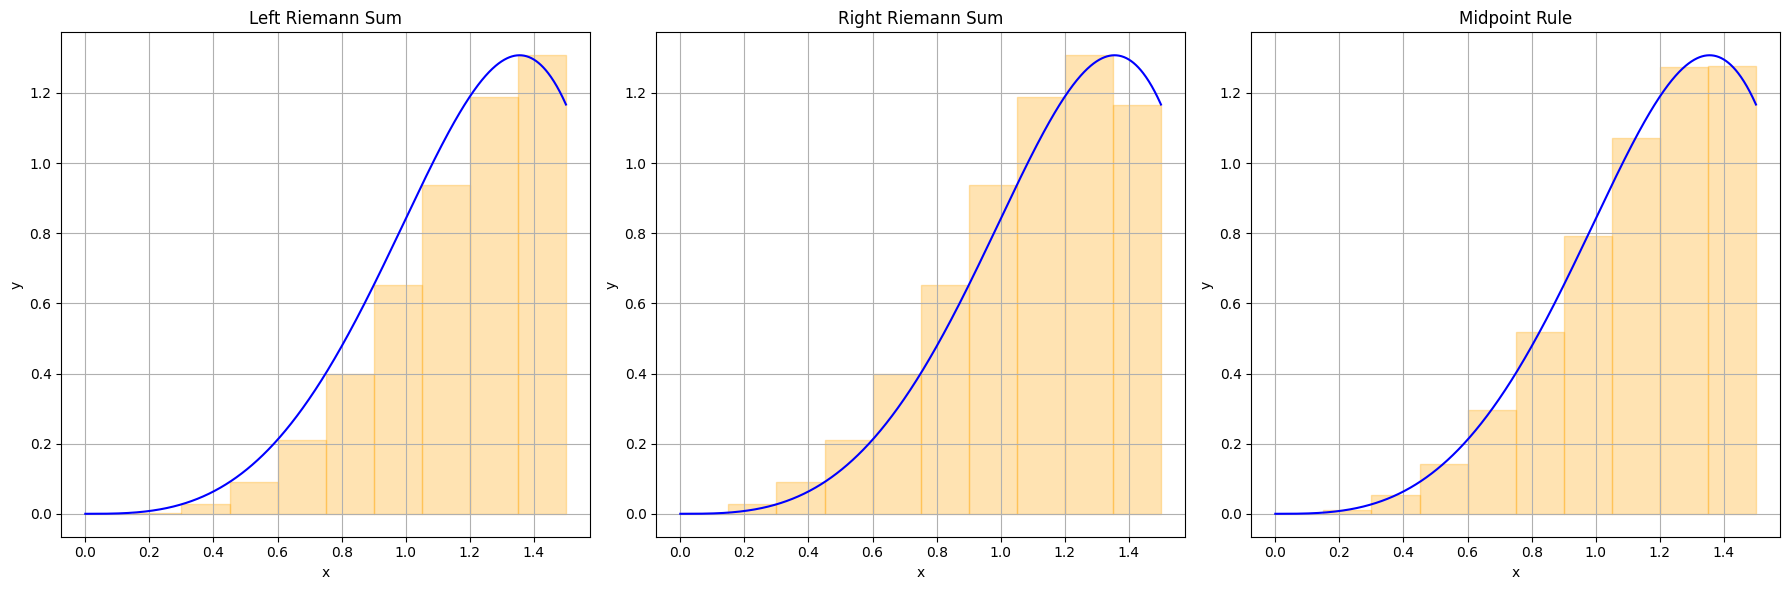

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*np.sin(x**2)

a = 0
b = 1.5
n = 10

dx = (b - a) / n

x_midpoints = np.linspace(a + 0.5*dx, b - 0.5*dx, n)

y_midpoints = f(x_midpoints)

fig, axs = plt.subplots(1, 3, figsize=(18, 6))

x_values = np.linspace(a, b, 1000)
axs[0].plot(x_values, f(x_values), 'b-')
axs[1].plot(x_values, f(x_values), 'b-')
axs[2].plot(x_values, f(x_values), 'b-')

for i in range(n):
    axs[0].fill_between([a + i*dx, a + (i+1)*dx], 0, f(a + i*dx), alpha=0.3, color='orange')

for i in range(n):
    axs[1].fill_between([a + i*dx, a + (i+1)*dx], 0, f(a + (i+1)*dx), alpha=0.3, color='orange')

for i in range(n):
    axs[2].fill_between([x_midpoints[i] - 0.5*dx, x_midpoints[i] + 0.5*dx], 0, y_midpoints[i], alpha=0.3, color='orange')

for ax in axs:
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.grid(True)

axs[0].set_title('Left Riemann Sum')
axs[1].set_title('Right Riemann Sum')
axs[2].set_title('Midpoint Rule')

plt.tight_layout()

In [2]:
def f(x):
    return x*np.sin(x**2)

exact_integral = (1-np.cos(4))/2

a = 0
b = 1.5
n = 10

def left_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    x_values = np.linspace(a, b - dx, n)
    return np.sum(f(x_values) * dx)

def right_riemann_sum(f, a, b, n):
    dx = (b - a) / n
    x_values = np.linspace(a + dx, b, n)
    return np.sum(f(x_values) * dx)

def midpoint_rule(f, a, b, n):
    dx = (b - a) / n
    x_values = np.linspace(a + 0.5*dx, b - 0.5*dx, n)
    return np.sum(f(x_values) * dx)

left_sum = left_riemann_sum(f, a, b, n)
right_sum = right_riemann_sum(f, a, b, n)
midpoint_sum = midpoint_rule(f, a, b, n)
left_error = abs(left_sum - exact_integral)
right_error = abs(right_sum - exact_integral)
midpoint_error = abs(midpoint_sum - exact_integral)

print(f"Exact Integral Value: {exact_integral}")
print(f"Left Riemann Sum: {left_sum}")
print(f"Right Riemann Sum: {right_sum}")
print(f"Midpoint Rule: {midpoint_sum}")
print(f"Error in Left Riemann Sum: {left_error}")
print(f"Error in Right Riemann Sum: {right_error}")
print(f"Error in Midpoint Rule: {midpoint_error}")


Exact Integral Value: 0.8268218104318059
Left Riemann Sum: 0.7227312206797187
Right Riemann Sum: 0.897797689979501
Midpoint Rule: 0.8159908328406638
Error in Left Riemann Sum: 0.10409058975208718
Error in Right Riemann Sum: 0.07097587954769513
Error in Midpoint Rule: 0.010830977591142155


### Trapezoidal Rule

The Trapezoid Rule fits a trapezoid into each subinterval and sums the areas of the trapezoids to approximate the total integral. The idea behind this is to capture a first order approximation of the behavior within the interval, one step above the rectangular sums. Something important to note is that it achieves the same accuracy as the midpoint rule. This is because they both essentially do the same thing, a linear approximation of the functions behavior between the interval. The trapezoidal rule does have one advantage over the midpoint rule, if you have data without an analytical function, you can achieve $O(\text{subinterval size}^2)$ error without needing to know the function value inbetween the intervals. Basically it is the superior method when attepting to integrate a dataset rather than a analytic function. Below we evaluate the same function as above with the trapeziodal rule:


Text(0.5, 1.0, 'Trapezoidal Rule for Numerical Integration')

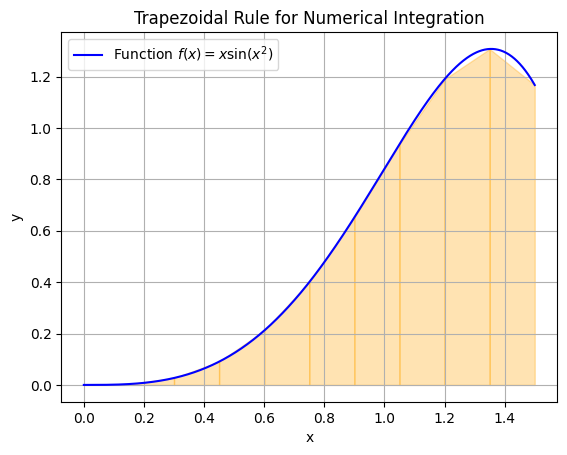

In [3]:
def f(x):
    return x*np.sin(x**2)

def trapezoidal_rule(f, a, b, n):
    dx = (b - a) / n
    x_values = np.linspace(a, b, n+1)
    y_values = f(x_values)
    return (dx/2) * (2*np.sum(y_values) - y_values[0] - y_values[-1])

trapezoidal_sum = trapezoidal_rule(f, a, b, n)

x_values = np.linspace(a, b, 1000)
y_values = f(x_values)

fig, ax = plt.subplots()

ax.plot(x_values, y_values, 'b-', label='Function $f(x)=x\sin(x^2)$')

for i in range(n):
    ax.fill_between([a + i*(b-a)/n, a + (i+1)*(b-a)/n], [f(a + i*(b-a)/n), f(a + (i+1)*(b-a)/n)], color='orange', alpha=0.3)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid(True)

plt.title('Trapezoidal Rule for Numerical Integration')

In [4]:
def f(x):
    return x*np.sin(x**2)

def trapezoidal_rule(f, a, b, n):
    dx = (b - a) / n
    x_values = np.linspace(a, b, n+1)
    y_values = f(x_values)
    return (dx/2) * (2*np.sum(y_values) - y_values[0] - y_values[-1])

trapezoidal_sum = trapezoidal_rule(f, a, b, n)

print("Trapezoidal Rule:", trapezoidal_sum)
print("Exact Integral Value:", exact_integral)

trapezoidal_error = abs(trapezoidal_sum - exact_integral)

print("Error in Trapezoidal Rule:", trapezoidal_error)

Trapezoidal Rule: 0.8102644553296097
Exact Integral Value: 0.8268218104318059
Error in Trapezoidal Rule: 0.016557355102196247
